# Validation curves

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [161]:
plt.rcParams['figure.figsize'] = (10,10)

## Regression example

**Let’s create some data to which we will fit our model:**

In [75]:
def makedata(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    x = rng.rand(N, 1) **2
    y = 10 -1./ (x.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return x, y


In [76]:
x, y = makedata(40)

**We can now visualize our data, along with polynomial fits of several degrees**

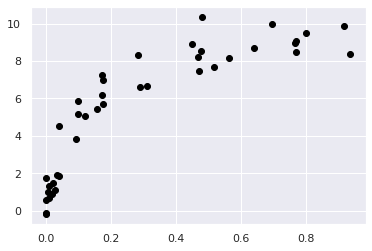

In [82]:
plt.scatter(x.ravel(), y, color='black')

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

## Create a linear regressor

In [85]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [86]:
model.score(x,y)

0.724324304506582

In [88]:
y_pred = model.predict(x)

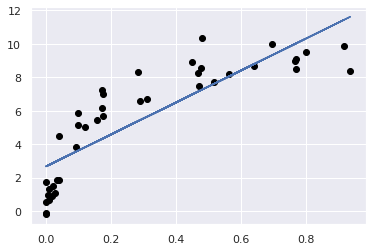

In [89]:
plt.plot(x.ravel(), y_pred)
plt.scatter(x.ravel(), y, color='black')

## Create a polynomial regressor

In [99]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [100]:
model2 = PolynomialRegression()

In [101]:
model2.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [102]:
model2.score(x,y)

0.8942747114996921

In [103]:
y_pred2 = model2.predict(x)

In [105]:
y_pred2

array([5.21085248, 9.29034256, 1.3913101 , 3.54617659, 1.92844858,
       1.60612545, 2.24763109, 4.14110569, 4.89953144, 7.10739223,
       5.24451566, 8.99180195, 2.41726904, 9.33040045, 1.41032135,
       8.84370491, 5.21523183, 7.40381263, 1.88354261, 2.35648173,
       9.62020808, 7.99544979, 3.69407937, 9.05856689, 9.34468135,
       9.17430945, 1.57370963, 1.42994641, 2.10652049, 9.33019047,
       1.63477347, 5.27419672, 8.21285237, 7.02175897, 9.05446967,
       3.72235595, 9.00407135, 9.57722696, 1.39978975, 9.47581628])

In [132]:
model3 = PolynomialRegression(degree=3)

In [133]:
y_pred3 = model3.fit(x, y).predict(x_lin)

In [124]:
model10.fit(x, y).score(x,y)

0.9513782579786239

In [116]:
x_lin = np.linspace(-0.1, 1, 100)[:, None]

In [118]:
y_pred = model.predict(x_lin)
y_pred2 = model2.predict(x_lin)

(0.0, 12.0)

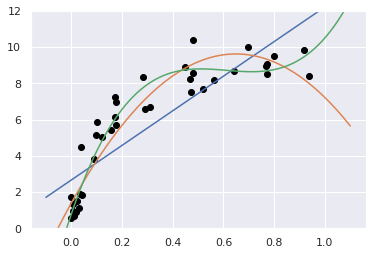

In [134]:
plt.plot(x_lin, y_pred)
plt.plot(x_lin, y_pred2)
plt.plot(x_lin, y_pred3)
plt.scatter(x.ravel(), y, color='black')
plt.ylim([0,12])

## Validation curve

**We can make progress in this by visualizing the validation curve for this particular data and model, we can do this straightforwardly using the validation_curve convenience routine provided by Scikit-Learn. Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validation score across the range**

In [137]:
from sklearn.model_selection import validation_curve

In [148]:
def plot_validation_curve(train_score, val_score, param_range=range(1,20)):
    plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
    plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
    plt.legend(loc='best')
    plt.ylim(0, 1)
    plt.xlabel('degree')
    plt.ylabel('score')
    plt.show()

In [141]:
train_score, val_score = validation_curve(PolynomialRegression(), x, y, param_name='polynomialfeatures__degree', param_range=np.arange(1,20), cv=5)

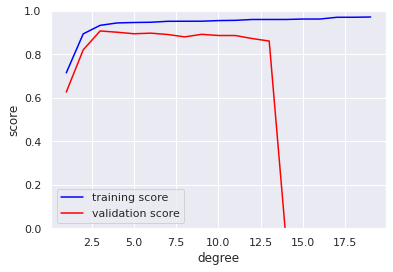

In [149]:
plot_validation_curve(train_score, val_score, param_range=range(1,20))

**Notice that finding this optimal model did not actually require us to compute the training score, but examining the relationship between the training score and validation score can give us useful insight into the performance of the model.**

## Learning curve

In [ ]:
from sklearn.model_selection import learning_curve

In [22]:
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)
    plt.legend(loc='best')

In [151]:
train_sizes, train_scores, validation_scores = learning_curve(PolynomialRegression(3), x, y, cv=5)

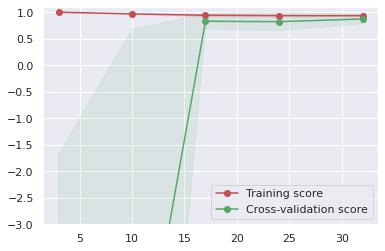

In [152]:
plot_learning_curve(train_sizes, train_scores, validation_scores)

## Classification example

In [157]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 

In [158]:
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

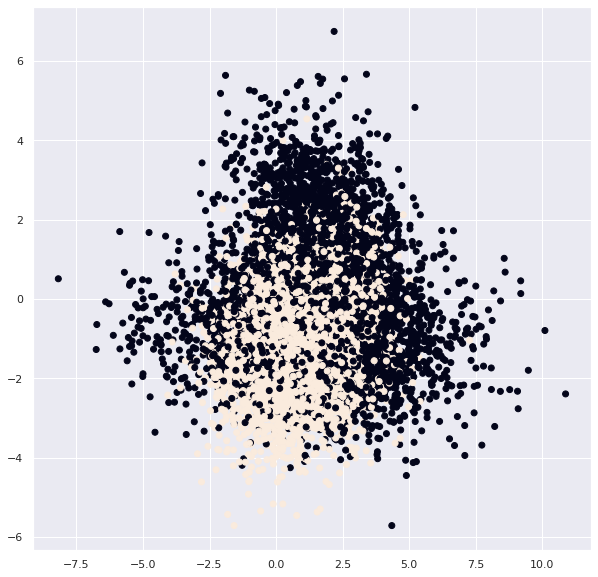

In [164]:
plt.scatter(X[:,0], X[:,1], c=y)

In [163]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 21)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, y_train)

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))




>1, train: 0.767, test: 0.767
>2, train: 0.808, test: 0.806
>3, train: 0.882, test: 0.873
>4, train: 0.902, test: 0.892
>5, train: 0.913, test: 0.895
>6, train: 0.930, test: 0.915
>7, train: 0.941, test: 0.920
>8, train: 0.953, test: 0.918
>9, train: 0.962, test: 0.921
>10, train: 0.970, test: 0.923
>11, train: 0.977, test: 0.921
>12, train: 0.983, test: 0.917
>13, train: 0.988, test: 0.913
>14, train: 0.992, test: 0.912
>15, train: 0.995, test: 0.911
>16, train: 0.997, test: 0.908
>17, train: 0.998, test: 0.913
>18, train: 0.999, test: 0.910
>19, train: 1.000, test: 0.908
>20, train: 1.000, test: 0.911


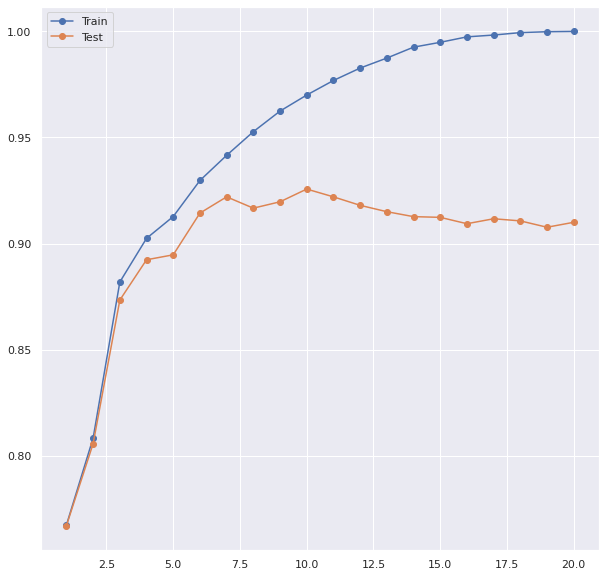

In [162]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()